In [1]:
import TAMIS
import  matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Stopped after step  100
final_step
4.989351272583008 for the   100 iterations
18.138465881347656 for the iterations
18.40231990814209 for the recycling
18.402421951293945 for recycling
23.39367127418518 seconds total


/Users/gregoire/Work/TAMIS_distrib/TAMIS/src/TAMIS/plots.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  pl =sns.lineplot(x="Iteration",
/Users/gregoire/Work/TAMIS_distrib/TAMIS/src/TAMIS/plots.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x="Iteration",


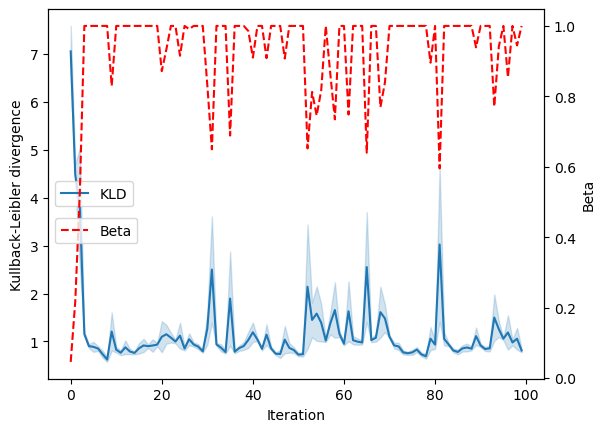

In [2]:
#Setting up a statistical model
#Should be a class with attributes log_prior and log_likelihood
#see examples.py
dim=5
var0 = [100]*dim
n_comp = 20
T_max = 100
n_sample = [2000]*(T_max)
init_mean = stats.uniform.rvs(size =(n_comp,dim),loc=-5,scale = 10)
prior = [init_mean,
         np.array([np.diag(var0)]*n_comp),
         np.ones((n_comp,))/n_comp]
init_theta = TAMIS.theta_params(prior)
small_banana =  TAMIS.Banana(var_banana = 100,dim = dim, b = 0.03)



#Running the sampler
test_banana =  TAMIS.TAMIS(target = small_banana,
                        n_comp = n_comp, 
                        init_theta=init_theta,
                        ESS_tol = np.inf,
                        alpha = 200,
                        tau = 0,
                        proposal = TAMIS.Mixture_gaussian,
                        n_sample=n_sample,
                        EM_solver ="homemade",
                        integer_weights = False,
                        recycle = True,
                        recycling_iters="auto",
                        verbose =0).result(T=T_max)


#Assessing convergence
TAMIS.plot_convergence(test_banana)
plt.show()

<Axes: >

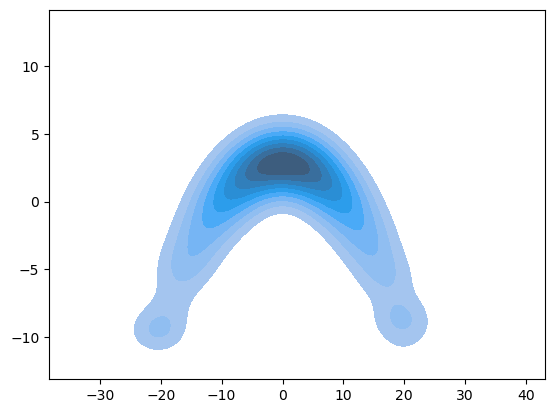

In [3]:
sns.kdeplot(x = test_banana.total_sample[:,0],y= test_banana.total_sample[:,1], fill = True, 
           weights = test_banana.final_weights)

Stopped after step  20
final_step
1.3750860691070557 for the   20 iterations
0.44730377197265625 for the iterations
0.4574260711669922 for the recycling
0.4574580192565918 for recycling
1.8330821990966797 seconds total
9113.505518140351


/Users/gregoire/Work/TAMIS_distrib/TAMIS/src/TAMIS/plots.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  pl =sns.lineplot(x="Iteration",
/Users/gregoire/Work/TAMIS_distrib/TAMIS/src/TAMIS/plots.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x="Iteration",


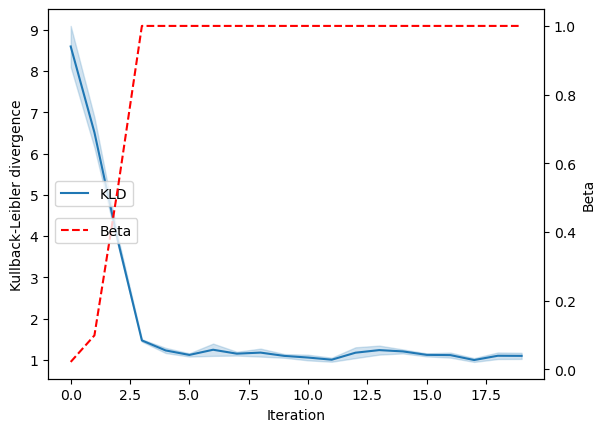

In [4]:

dim=3
var0 = [10]*dim
n_comp = 10
T_max = 20
n_sample = [10000] +[3000]*(T_max-1)
init_mean = stats.uniform.rvs(size =(n_comp,dim),loc=-2,scale = 2)
prior = [init_mean,
         np.array([np.diag(var0)]*n_comp),
         np.ones((n_comp,))/n_comp]

init_theta = TAMIS.theta_params(prior)

speagle = TAMIS.reg_log_speagle()

test_speagle = TAMIS.TAMIS(target = speagle,
                        n_comp = n_comp, 
                        init_theta=init_theta,
                        ESS_tol = 17000,
                        alpha = 100,
                        tau = 0,
                        proposal = TAMIS.Mixture_gaussian,
                        n_sample=n_sample,
                        EM_solver ="homemade",
                        integer_weights = False,
                        recycle = True,
                        recycling_iters="auto",
                        verbose =0).result(T=T_max)

TAMIS.plot_convergence(test_speagle)
print(test_speagle.ESS_final)
plt.show()


<Axes: >

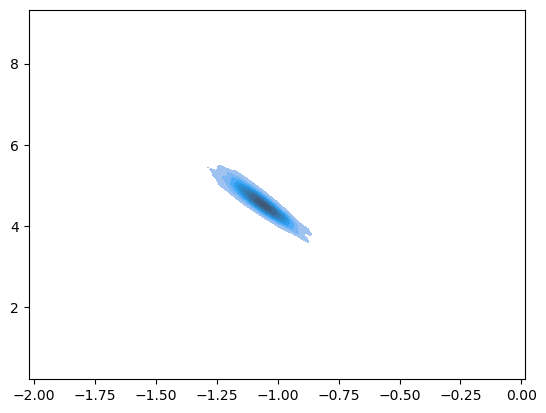

In [5]:
sns.kdeplot(x = test_speagle.total_sample[:,0],y= test_speagle.total_sample[:,1], fill = True, 
           weights = test_speagle.final_weights)

In [6]:
TAMIS.mean_res(test_speagle)

array([-1.07129346,  4.58496423, -0.68752911])

In [8]:
TAMIS.cov_res(test_speagle)

array([0.00666815, 0.13534963, 0.01940734])